In [1]:
import numpy as np
import qutip
import matplotlib.pyplot as plt

In [2]:
# Define the collapse operators (Lindblad operators)
T = 1
num_t = 1000
sigma = 1
d_num, A_num = 100, 200
d_interval, A_interval = 0.3, 100

In [3]:
def omega(t, args):
    return args["O"] * np.sin(np.pi * t / args["sigma"]) * np.heaviside(t, 1) * np.heaviside(args["sigma"] - t, 1)


In [4]:
# def detuning(n, t, assym, omega):
#     return assym * (n - 1) + (n - 1) * (n - 2) * omega(t) / 8
rho0 = qutip.Qobj([
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
])
options = qutip.Options()
options.nsteps = 5000
tlist = np.linspace(0, sigma, num_t)
d_range = np.linspace(0.03125-d_interval / 2,0.03125+d_interval / 2,d_num)
A_range = np.linspace(0, A_interval, A_num)


In [5]:
tr_probs = []
for n_d, d in enumerate(d_range):
    values = []
    for n_A, A in enumerate(A_range):
        
        # Define the Hamiltonian (you will need to add your own Hamiltonian terms)

        H0 = d * qutip.Qobj([[0,0,0,0,0,0,0,0],
                                   [0,0,0,0,0,0,0,0],
                                   [0,0,1,0,0,0,0,0],
                                   [0,0,0,2,0,0,0,0],
                                   [0,0,0,0,3,0,0,0],
                                   [0,0,0,0,0,4,0,0],
                                   [0,0,0,0,0,0,5,0],
                                   [0,0,0,0,0,0,0,6]])
        H1 = 0.5 * qutip.Qobj([[0,1,0,0,0,0,0,0],
                               [1,0,np.sqrt(2),0,0,0,0,0],
                               [0,np.sqrt(2),0,np.sqrt(3),0,0,0,0],
                               [0,0,np.sqrt(3),2*1/4,np.sqrt(4),0,0,0],
                               [0,0,0,np.sqrt(4),2*3/4,np.sqrt(5),0,0],
                               [0,0,0,0,np.sqrt(5),2*3/2,np.sqrt(6),0],
                               [0,0,0,0,0,np.sqrt(6),2*5/2,np.sqrt(7)],
                               [0,0,0,0,0,0,np.sqrt(7),2*15/4],])
        output = qutip.mesolve(
            [
                H0, 
                [H1, omega]
            ],
            rho0=rho0,
            args={"O": A, "sigma": sigma},
            tlist=tlist,
            options=options
        )
        values.append(output.states[-1])
        
    tr_probs.append(values)


In [6]:
leakage = np.zeros((d_num, A_num))
for d in range(d_num):
    for A in range(A_num):
        sum = 0
        for i in range(2,8):
            sum+=np.abs(tr_probs[d][A].data[i,i])
        leakage[d, A] = sum

In [7]:
print(leakage)

[[0.00000000e+00 3.21632348e-04 4.89097008e-03 ... 9.84889275e-01
  9.63289472e-01 9.29391720e-01]
 [0.00000000e+00 3.21639520e-04 4.89108229e-03 ... 9.84850393e-01
  9.63217165e-01 9.29288540e-01]
 [0.00000000e+00 3.21646507e-04 4.89119168e-03 ... 9.84811034e-01
  9.63145534e-01 9.29185335e-01]
 ...
 [0.00000000e+00 3.21469364e-04 4.88880204e-03 ... 9.80653406e-01
  9.55879791e-01 9.19007457e-01]
 [0.00000000e+00 3.21458652e-04 4.88864984e-03 ... 9.80605072e-01
  9.55797074e-01 9.18897585e-01]
 [0.00000000e+00 3.21447755e-04 4.88849497e-03 ... 9.80556333e-01
  9.55716048e-01 9.18786584e-01]]


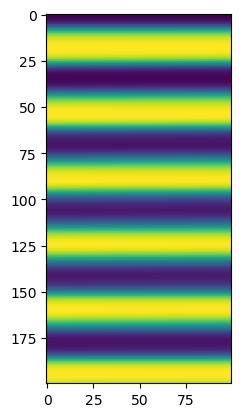

In [8]:
fig1, ax1 = plt.subplots(1,1)
ax1.imshow(leakage.T)

In [9]:
tr = np.zeros((d_num, A_num))
for d in range(d_num):
    for A in range(A_num):
        tr[d, A] = np.abs(tr_probs[d][A].data[1,1])

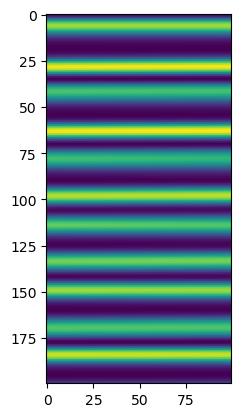

In [10]:
fig2, ax2 = plt.subplots(1,1)
ax2.imshow(tr.T)